Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.


n_componentsint, float or ‘mle’, default=None
Number of components to keep. if n_components is not set all components are kept:

n_components == min(n_samples, n_features)

In [ ]:
import mpl_toolkits.mplot3d
import numpy as np

from sklearn import datasets,decomposition

np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y=iris.target

fig=plt.figure(1,figsize=(4,3))
plt.clf()


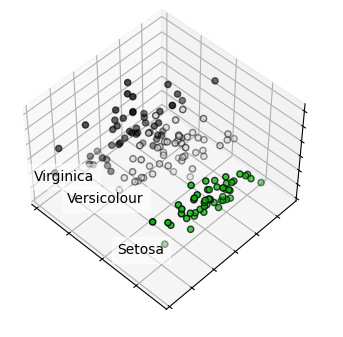

In [ ]:
import matplotlib.pyplot as plt
#unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d      # noqa: F401
import numpy as np
from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y= iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax =  fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
pca = decomposition.PCA(n_components=3)

pca.fit(X)
X=pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
  ax.text3D(
        X[y== label, 0].mean(),
        X[y ==label, 1].mean() + 1.5,
        X[y==label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor = "w", facecolor="w"),)
#Reorder the Labels to have colors matching the cluster results
y= np.choose(y, [1, 2, 0]).astype(float)
ax.scatter (X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolors='k')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.show()

#Incremental PCA

Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

This example serves a visual check the ipca is able to find a similar projection of to pca , while only processing a few samples a time .This can be considered a tooy example as ipca is intended to be used for large datasets.

As ipca is intended for large datasets which do not fit in main memory requireing incremental approach

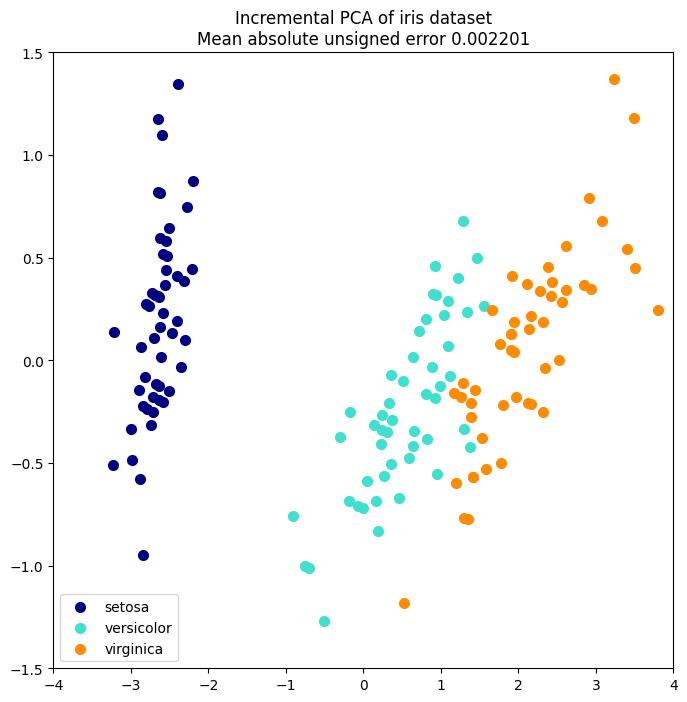

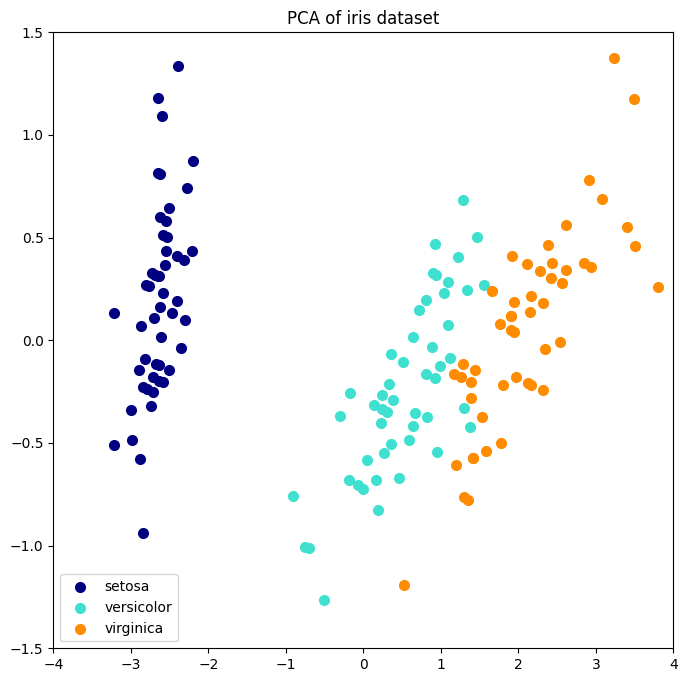

In [ ]:
# Authors: Kyle Kastner
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()